## WeatherPy

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

## Perform API Calls

In [14]:
# Using the Open Weather API gather information about the weather of the cities
loc = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

record = 0
sets = 1


print("Beginning Data Retrival")
print( "-" * 29)

time.sleep(1)
for place in cities:
    
    query_url = f"{url}appid={weather_api_key}&q={place}&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    try:
        loc.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        hum.append(weather_json["main"]["humidity"])
        cloud.append(weather_json["clouds"]["all"])
        wind.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        
        if record < 49:
            record += 1
        
        else:
            record = 0
            sets += 1
        
        print(f"Processing Record of {record} of Set {sets} | {place}")
    except:
        print(f"City not found. Skipping ... ")

Beginning Data Retrival
-----------------------------
Processing Record of 1 of Set 1 | kapaa
City not found. Skipping ... 
Processing Record of 2 of Set 1 | nawa
Processing Record of 3 of Set 1 | gravdal
Processing Record of 4 of Set 1 | ushuaia
Processing Record of 5 of Set 1 | roma
Processing Record of 6 of Set 1 | jamestown
City not found. Skipping ... 
Processing Record of 7 of Set 1 | vanersborg
Processing Record of 8 of Set 1 | hermanus
Processing Record of 9 of Set 1 | taoudenni
Processing Record of 10 of Set 1 | san juan
City not found. Skipping ... 
Processing Record of 11 of Set 1 | hambantota
Processing Record of 12 of Set 1 | saldanha
Processing Record of 13 of Set 1 | aklavik
Processing Record of 14 of Set 1 | doka
Processing Record of 15 of Set 1 | tuatapere
Processing Record of 16 of Set 1 | picton
Processing Record of 17 of Set 1 | mar del plata
Processing Record of 18 of Set 1 | mahebourg
Processing Record of 19 of Set 1 | cabo san lucas
City not found. Skipping ... 


Processing Record of 29 of Set 4 | bathsheba
Processing Record of 30 of Set 4 | mahibadhoo
Processing Record of 31 of Set 4 | camacha
Processing Record of 32 of Set 4 | koster
City not found. Skipping ... 
City not found. Skipping ... 
Processing Record of 33 of Set 4 | fortuna
Processing Record of 34 of Set 4 | bonavista
Processing Record of 35 of Set 4 | ossora
Processing Record of 36 of Set 4 | emilio carranza
Processing Record of 37 of Set 4 | lanigan
Processing Record of 38 of Set 4 | kuryk
Processing Record of 39 of Set 4 | lonavale
Processing Record of 40 of Set 4 | venado tuerto
Processing Record of 41 of Set 4 | xanxere
Processing Record of 42 of Set 4 | yellowknife
City not found. Skipping ... 
Processing Record of 43 of Set 4 | caico
Processing Record of 44 of Set 4 | provideniya
City not found. Skipping ... 
Processing Record of 45 of Set 4 | guozhen
Processing Record of 46 of Set 4 | pljevlja
Processing Record of 47 of Set 4 | vestmanna
Processing Record of 48 of Set 4 | o

Processing Record of 5 of Set 8 | udimskiy
Processing Record of 6 of Set 8 | shahabad
Processing Record of 7 of Set 8 | conceicao do araguaia
Processing Record of 8 of Set 8 | rio gallegos
Processing Record of 9 of Set 8 | hecun
Processing Record of 10 of Set 8 | bubaque
Processing Record of 11 of Set 8 | cabedelo
Processing Record of 12 of Set 8 | cayhagan
Processing Record of 13 of Set 8 | soyo
Processing Record of 14 of Set 8 | san javier
Processing Record of 15 of Set 8 | chicama
Processing Record of 16 of Set 8 | nome
Processing Record of 17 of Set 8 | chuzhou
Processing Record of 18 of Set 8 | maniitsoq
Processing Record of 19 of Set 8 | kathmandu
Processing Record of 20 of Set 8 | odessa
Processing Record of 21 of Set 8 | kingman
Processing Record of 22 of Set 8 | xinmin
Processing Record of 23 of Set 8 | san andres
Processing Record of 24 of Set 8 | boa vista
City not found. Skipping ... 
Processing Record of 25 of Set 8 | narrabri
Processing Record of 26 of Set 8 | karaton
Pro

Processing Record of 30 of Set 11 | kyaikkami
Processing Record of 31 of Set 11 | sechura
Processing Record of 32 of Set 11 | makakilo city
Processing Record of 33 of Set 11 | zhangye
Processing Record of 34 of Set 11 | camacupa
Processing Record of 35 of Set 11 | havre-saint-pierre
Processing Record of 36 of Set 11 | port keats
Processing Record of 37 of Set 11 | linjiang
Processing Record of 38 of Set 11 | pahrump
Processing Record of 39 of Set 11 | caranavi
Processing Record of 40 of Set 11 | syntul
Processing Record of 41 of Set 11 | houma
Processing Record of 42 of Set 11 | taikang
Processing Record of 43 of Set 11 | scottsbluff
Processing Record of 44 of Set 11 | ayan
Processing Record of 45 of Set 11 | guerrero negro
Processing Record of 46 of Set 11 | shimanovsk
City not found. Skipping ... 
Processing Record of 47 of Set 11 | alta floresta
Processing Record of 48 of Set 11 | parabel
City not found. Skipping ... 
Processing Record of 49 of Set 11 | zyryanovsk
Processing Record 

In [15]:
# Create a DataFrame for the random cities
weather_dict = {'City': ten,
                'Lat': lat,
                'Lng': lng,
                'Max Temp': max_temp,
                'Humidity': hum,
                'Cloudiness': cloud,
                'Wind Speed': wind,
                'Country': country,
                'Date': date}

city_Weather = pd.DataFrame.from_dict(weather_dict, orient = "index")
city_Weather = city_Weather.transpose()
city_Weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.319,73.4,53,20,3.44,US,1613019222
1,mys shmidta,27.0167,75,72.34,25,0,5.21,IN,1613019222
2,nawa,68.1214,13.5031,31.06,86,94,9.28,NO,1613019223
3,gravdal,-54.8,-68.3,64.4,48,40,14.97,AR,1613019174
4,ushuaia,43.2128,-75.4557,17.01,73,90,1.41,US,1613018996
...,...,...,...,...,...,...,...,...,...
569,None,60.5544,-151.258,19.99,79,90,16.11,US,1613019322
570,None,-12.1333,-75.2333,49.33,74,100,1.03,PE,1613019322
571,None,33.0559,113.798,60.64,41,0,2.13,CN,1613019322
572,None,-25.2667,23.2833,71.47,71,71,1.63,BW,1613019322


In [30]:
city_Weather["Humidity"].max()

100

## Convert Raw Data to DataFrame

In [16]:
# Export the city weather dat to a csv
city_Weather.to_csv(output_data_file)

# View the dataframe
city_Weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.319,73.4,53,20,3.44,US,1613019222
1,mys shmidta,27.0167,75,72.34,25,0,5.21,IN,1613019222
2,nawa,68.1214,13.5031,31.06,86,94,9.28,NO,1613019223
3,gravdal,-54.8,-68.3,64.4,48,40,14.97,AR,1613019174
4,ushuaia,43.2128,-75.4557,17.01,73,90,1.41,US,1613018996


## Plotting the Data

### Temperature vs. Latitude

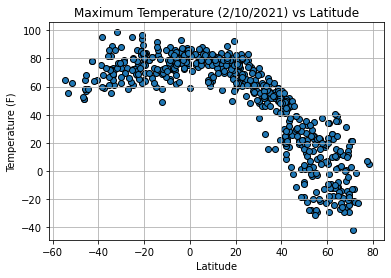

In [19]:
# Scatter plot of temp vs latitude of the cities

plt.scatter(lat,max_temp, marker = "o", edgecolor = "black")

plt.title("Maximum Temperature (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

plt.show()

This scatter plot displays the relationship between
a city's maximum temperature and a city's latitude in February. 
This displays how the city's latitude, distance from the equator, affects
a city's maximum temperature.

### Humidity vs. Latitude

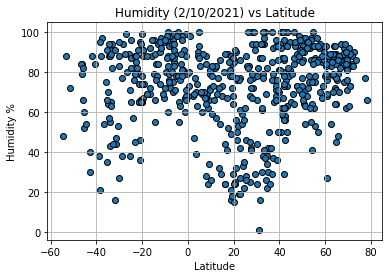

In [72]:
# Scatter plot of humidity vs latitude of the cities

plt.scatter(lat,hum, marker = "o", edgecolor = "black")

plt.title("Humidity (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)
plt.show()

This scatter plot displays the relationship between a city's 
humidity and a city's latitude in February. 
This displays how the city's latitude, distance from the equator, 
affects a city's humidity.

### Cloudiness vs. Latitude

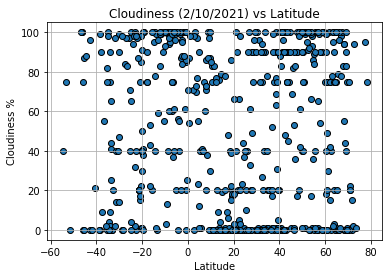

In [71]:
# Scatter plot of cloudiness vs latitude of the cities

plt.scatter(lat,cloud, marker = "o", edgecolor = "black")

plt.title("Cloudiness (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.show()

This scatter plot displays the relationship between a city's cloudiness, sky coverage of clouds, and a city's latitude in February. This displays how the city's latitude, distance from the equator, affects a city's cloudiness.

### Wind Speed vs. Latitude

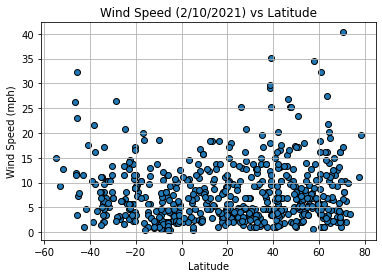

In [70]:
# Scatter plot of cloudiness vs latitude of the cities

plt.scatter(lat,wind, marker = "o", edgecolor = "black")

plt.title("Wind Speed (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()

This scatter plot displays the relationship between a city's wind speed and a city's latitude in February. This displays how the city's latitude, distance from the equator, affects a city's wind speed.

## Linear Regression

In [28]:
northern_hemisphere = city_Weather.loc[city_Weather["Lat"] >= 0, :]
southern_hemisphere = city_Weather.loc[city_Weather["Lat"] <= 0, :]

In [69]:
n_lat = northern_hemisphere["Lat"].astype(float)
n_temp = northern_hemisphere["Max Temp"].astype(float)
n_hum = northern_hemisphere["Humidity"].astype(float)
n_cloud = northern_hemisphere["Cloudiness"].astype(float)
n_wind = northern_hemisphere["Wind Speed"].astype(float)

s_lat = southern_hemisphere["Lat"].astype(float)
s_temp = southern_hemisphere["Max Temp"].astype(float)
s_hum = southern_hemisphere["Humidity"].astype(float)
s_cloud = southern_hemisphere["Cloudiness"].astype(float)
s_wind = southern_hemisphere["Wind Speed"].astype(float)

#### Northern Hemisphere - Temperature vs. Latitude

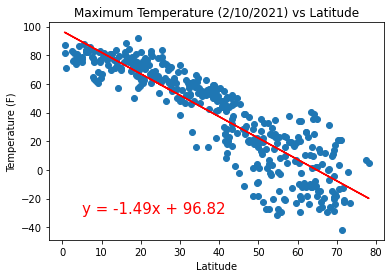

The r value is -0.8828752235731818
The r squared value is 0.7794686603993958


In [75]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(n_lat,n_temp, marker = "o")

plt.title("Maximum Temperature (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Linear regression of N. Hemi Temperature vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)

# creating linear regression line
regress_line = slope * n_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(n_lat, regress_line, color = "red")
plt.annotate(line_eq, (5,-30), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Southern Hemisphere - Temperature vs. Latitude

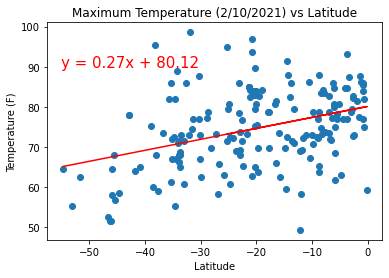

The r value is 0.376629374987106
The r squared value is 0.14184968610317814


In [74]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(s_lat,s_temp, marker = "o")

plt.title("Maximum Temperature (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Linear regression of S. Hemi Temperature vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)

# creating linear regression line
regress_line = slope * s_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(s_lat, regress_line, color = "red")
plt.annotate(line_eq, (-55,90), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Northern Hemisphere - Humidity vs. Latitude

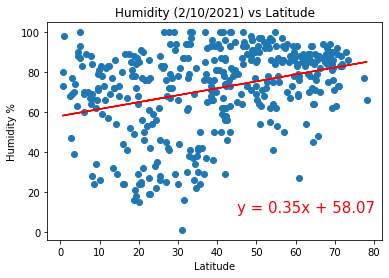

The r value is 0.32193404291965444
The r squared value is 0.10364152799059391


In [77]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(n_lat,n_hum, marker = "o")

plt.title("Humidity (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Linear regression of N. Hemi Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)

# creating linear regression line
regress_line = slope * n_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(n_lat, regress_line, color = "red")
plt.annotate(line_eq, (45,10), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Southern Hemisphere - Humidity vs. Latitude

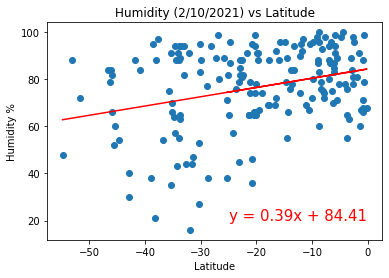

The r value is 0.30025305529271
The r squared value is 0.09015189721260718


In [85]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(s_lat,s_hum, marker = "o")

plt.title("Humidity (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Linear regression of S. Hemi Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_hum)

# creating linear regression line
regress_line = slope * s_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(s_lat, regress_line, color = "red")
plt.annotate(line_eq, (-25,20), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Northern Hemisphere - Cloudiness vs. Latitude

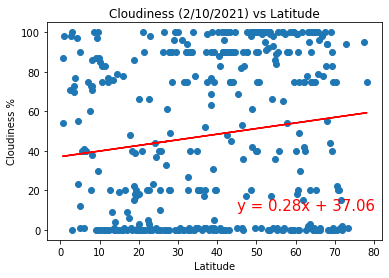

The r value is 0.13824156840200746
The r squared value is 0.01911073123424691


In [79]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(n_lat,n_cloud, marker = "o")

plt.title("Cloudiness (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Linear regression of N. Hemi Cloudiness vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)

# creating linear regression line
regress_line = slope * n_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(n_lat, regress_line, color = "red")
plt.annotate(line_eq, (45,10), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Southern Hemisphere - Cloudiness vs. Latitude

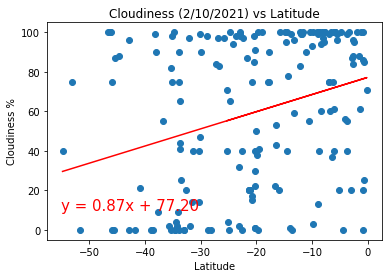

The r value is 0.302463142435615
The r squared value is 0.09148395253202714


In [89]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(s_lat,s_cloud, marker = "o")

plt.title("Cloudiness (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Linear regression of S. Hemi Cloudiness vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)

# creating linear regression line
regress_line = slope * s_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(s_lat, regress_line, color = "red")
plt.annotate(line_eq, (-55,10), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Northern Hemisphere - Wind Speed vs. Latitude

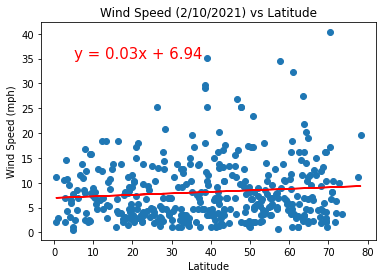

The r value is 0.09626228644697488
The r squared value is 0.009266427791999442


In [81]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(n_lat,n_wind, marker = "o")

plt.title("Wind Speed (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Linear regression of N. Hemi Wind Speed vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)

# creating linear regression line
regress_line = slope * n_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(n_lat, regress_line, color = "red")
plt.annotate(line_eq, (5,35), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')

#### Southern Hemisphere - Wind Speed vs. Latitude

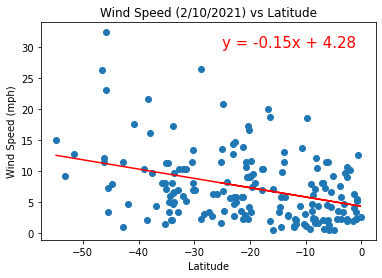

The r value is -0.36479316622902225
The r squared value is 0.13307405412739506


In [93]:
# Scatter plot of temperature vs latitude of the cities

plt.scatter(s_lat,s_wind, marker = "o")

plt.title("Wind Speed (2/10/2021) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Linear regression of S. Hemi Wind Speed vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind)

# creating linear regression line
regress_line = slope * s_lat + intercept

line_eq = f'y = {slope:.2f}x + {intercept:.2f}'

plt.plot(s_lat, regress_line, color = "red")
plt.annotate(line_eq, (-25,30), color = "red", fontsize = 15)
plt.show()

# printing r value and r squared values
print(f'The r value is {rvalue}')
print(f'The r squared value is {rvalue**2}')